<a href="https://colab.research.google.com/github/hamzabinashraf/Spam_Message_Detection/blob/main/Spam_Message_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
#import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, pair_confusion_matrix, mean_squared_error,r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
#load data_set
data = pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
#drop un-useful columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#label dataset columns
data = data [['v1','v2']]
data.columns = ['label','message']
data['label'] = data['label'].map({'ham':0,'spam':1})
data.head()

<ipython-input-15-d7904940dce9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham':0,'spam':1})


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#split data in Train and Test dataset
x_train, x_test, y_train, y_test = train_test_split(
    data['message'],
    data['label'],
    test_size=0.2,random_state=42)

In [17]:
# check length of train and test data
len(x_train), len(x_test)

(4457, 1115)

In [19]:
#drop stop_words from data
Tfidf = TfidfVectorizer(stop_words='english')
x_train_Tfidf = Tfidf.fit_transform(x_train)
x_test_Tfidf = Tfidf.transform(x_test)

In [21]:
# Define, configure, and compile a sequential neural network model for binary classification.
model = Sequential()  # Initialize a sequential model
model.add(Dense(64, input_shape=(x_train_Tfidf.shape[1],), activation='relu'))  # Add a dense layer with 64 units and ReLU activation
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model with specified loss, optimizer, and metrics

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Train the model with early stopping using training and validation data.
history = model.fit(x_train_Tfidf, y_train, epochs=10, batch_size=32, validation_data=(x_test_Tfidf, y_test),callbacks = [EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8212 - loss: 0.5400 - val_accuracy: 0.8735 - val_loss: 0.1997
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9227 - loss: 0.1668 - val_accuracy: 0.9776 - val_loss: 0.0815
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9878 - loss: 0.0494 - val_accuracy: 0.9812 - val_loss: 0.0748
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9969 - loss: 0.0191 - val_accuracy: 0.9812 - val_loss: 0.0748
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9976 - loss: 0.0130 - val_accuracy: 0.9812 - val_loss: 0.0816
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9990 - loss: 0.0079 - val_accuracy: 0.9803 - val_loss: 0.0877
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9988 - loss: 0.0062 - val_accuracy: 0.9821 - val_loss: 0.0873


In [25]:
loss , accuracy = model.evaluate(x_test_Tfidf, y_test)
print(f'Test Loss:{loss: 4f}')
print(f'Test Accuracy:{accuracy: 4f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9862 - loss: 0.0585
Test Loss: 0.087329
Test Accuracy: 0.982063


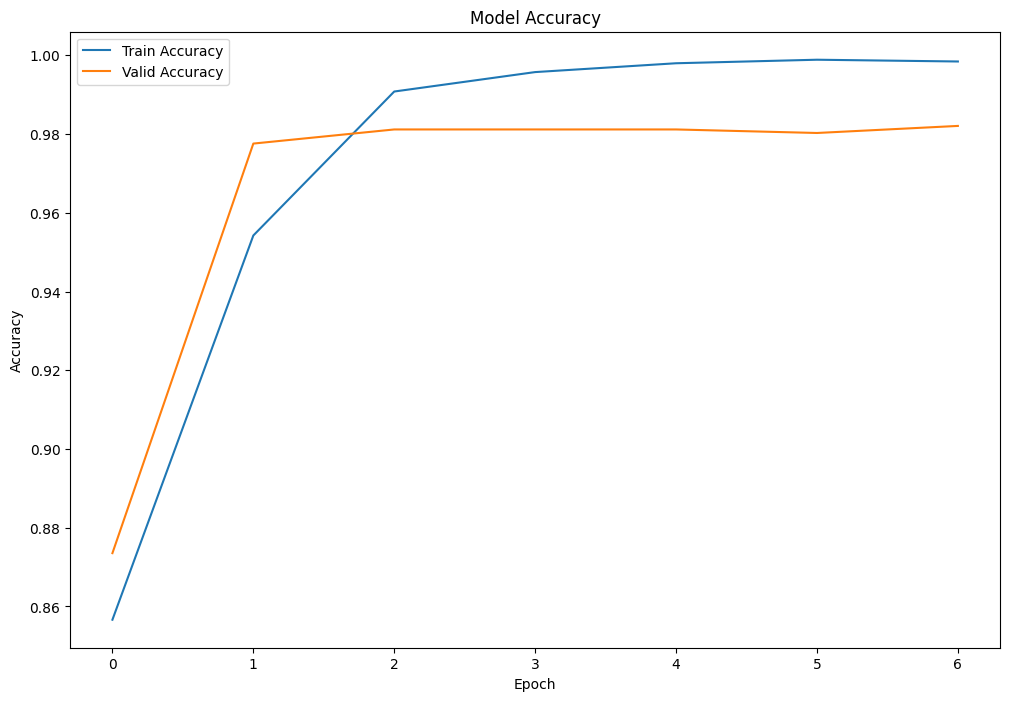

In [30]:
# Plot the training and validation accuracy over epochs.
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Valid Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

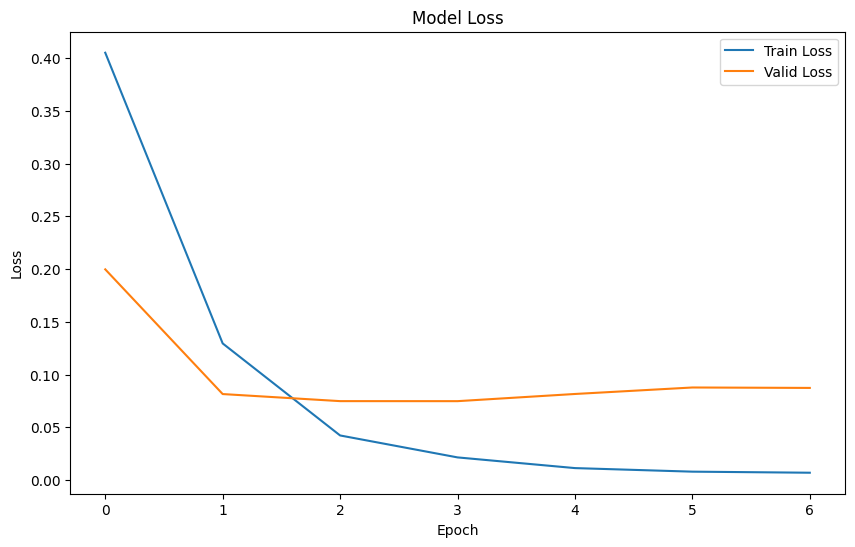

In [32]:
# Visualize training and validation loss curves.
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# Predicts whether a given message is spam or not spam.
def predict_spam(message):
    message_tfidf = Tfidf.transform([message])
    prediction = model.predict(message_tfidf)[0][0]
    if prediction >= 0.5:
        return 'Spam'
    else:
        return 'Not Spam'

In [34]:
#taking input from the user and return answer weather message is spam or not
user_input = input("Enter a message: ")
result = predict_spam(user_input)
print("Prediction:", result)

Enter a message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction: Spam


In [35]:
#save our model
model.save('spam_detection_model.h5')